# ML Andrew Ng course 
<hr>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
import time
from mpl_toolkits.mplot3d import Axes3D

## Ex 1 Part 1 Single Variable Linear Regression

In [396]:
csv = pd.read_csv("ml coursera/ex1data1.csv")

In [397]:
csv.head()

,"Population in 10,000",Price in $10000
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [398]:
csv.describe()

,"Population in 10,000",Price in $10000
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### A graphical distribution of data

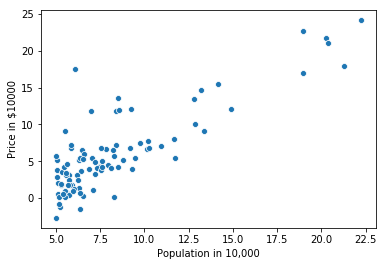

In [399]:
sns.scatterplot(x='Population in 10,000',y='Price in $10000',data=csv)

A clear linear pattern is visible

Renaming columns for ease of programming

In [400]:
csv.columns = ['pop','price']

In [401]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
pop      97 non-null float64
price    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


#### Initial Fit

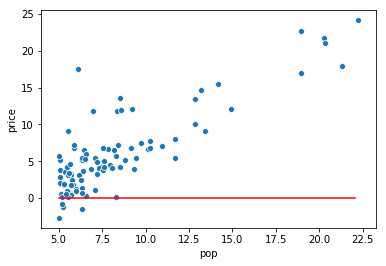

In [402]:
theta = [0,0]
x = np.arange(min(csv['pop']),max(csv['pop']))
h = [theta[0] + theta[1]*i for i in x]
sns.lineplot(x=x, y=h, color='red')
sns.scatterplot(x='pop',y='price',data=csv)

#### Creating matrices

In [403]:
csv['x0'] = np.ones((len(csv),1))

In [404]:
csv.head()

,pop,price,x0
0,6.1101,17.5920,1.0
1,5.5277,9.1302,1.0
2,8.5186,13.6620,1.0
3,7.0032,11.8540,1.0
4,5.8598,6.8233,1.0


In [405]:
X = np.matrix(csv[['x0','pop']])
y = np.matrix(csv['price']).reshape((len(csv),1))
m = len(csv)

In [406]:
theta = np.matrix([0,0]).reshape((2,1))

### Update Theta, Cost Calculation & Gradient Descent

In [407]:
def predict(X, theta):
    return X.dot(theta)

In [408]:
def updateTheta0(h, theta, alpha):
    error = h-y
    dj = alpha * sum(error).item(0)/m
    return theta.item((0,0))-dj

def updateTheta1(h, x, theta, alpha):
    error = [ (h.item(i)-y.item(i))*x[:,1].item(i) for i in range(m)] 
    dj = alpha * sum(error)/m
    return theta.item((1,0))-dj

def calcCost(x, theta):
    h = predict(x, theta)
    j = [ (h.item(i)-y.item(i))**2 for i in range(m)] 
    return sum(j)/(2*m)

def gradientDescent(x, n, theta, alpha):
    j = [calcCost(x, theta)]
    theta0 = [0]
    theta1 = [1]
    for i in range(1, n):
        h = predict(x, theta)
        t0 = updateTheta0(h, theta, alpha)
        t1 = updateTheta1(h, x, theta, alpha)
        theta = np.matrix([t0, t1]).reshape((2,1))
        theta0.append(t0)
        theta1.append(t1)
        j.append(calcCost(x, theta))
    return j, theta0, theta1 

#### Lets try descent with alpha = 0.01

In [409]:
j, t0, t1 = gradientDescent(X, 2000, theta, 0.01)

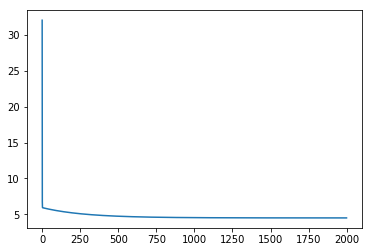

In [410]:
sns.lineplot(x=range(len(j)),y=j)

#### The cost function clearly converges around 1200 iterations

In [411]:
t0 = [np.float16(t) for t in t0]
t1 = [np.float16(t) for t in t1]
j = [np.float16(t) for t in j]

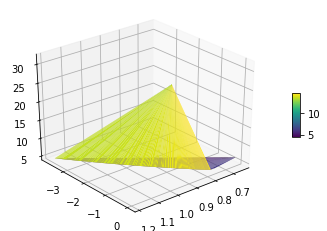

In [412]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(t1, t0, j, cmap=plt.cm.viridis, linewidth=0.2)
#plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(t1, t0, j, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.2, aspect=5)
#plt.show()
 
# Rotate it
ax.view_init(30, 50)
plt.show()

### Final Fit

In [442]:
theta = np.matrix([t0[-1], t1[-1]]).reshape((2,1))
"h(xi) = "+str(t0[-1])+" + "+str(t1[-1])+"xi"

'h(xi) = -3.787 + 1.183xi'

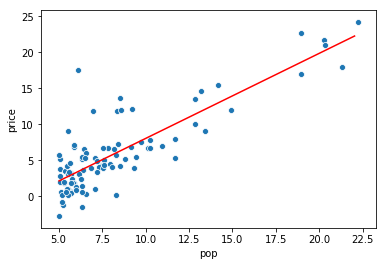

In [414]:
x = np.arange(min(csv['pop']),max(csv['pop']))
h = [t0[-1] + t1[-1]*i for i in x]
sns.lineplot(x=x, y=h, color='red')
sns.scatterplot(x='pop',y='price',data=csv)

### Prediction

In [449]:
def predictPrice(pop):
    return (theta.item(0)+theta.item(1)*(pop/10000))*10000

In [454]:
predictPrice(35000)

3520.5078125

## Ex 1 Part 2 Multivariate Linear Regression

In [415]:
csv = pd.read_csv("ml coursera/ex1data2.csv", header=None)

In [416]:
csv.columns = ['size','#bedroom','price']

In [417]:
csv.describe()

,size,#bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Feature Scaling

In [418]:
csvInfo = csv.describe()

In [419]:
sizer = csvInfo.loc['max','size']-csvInfo.loc['min','size']
size = [(csv.loc[i,'size']-csvInfo.loc['mean','size'])/sizer for i in range(len(csv))]
csv['size'] = size

In [420]:
brr = csvInfo.loc['max','#bedroom']-csvInfo.loc['min','#bedroom']
br = [(csv.loc[i,'#bedroom']-csvInfo.loc['mean','#bedroom'])/brr for i in range(len(csv))]
csv['#bedroom'] = br

In [421]:
csv['x0'] = np.ones((len(csv),1))
csv.head()

,size,#bedroom,price,x0
0,0.028494,-0.042553,399900,1.0
1,-0.110502,-0.042553,329900,1.0
2,0.110127,-0.042553,369000,1.0
3,-0.161247,-0.292553,232000,1.0
4,0.275598,0.207447,539900,1.0


### Distribution of data

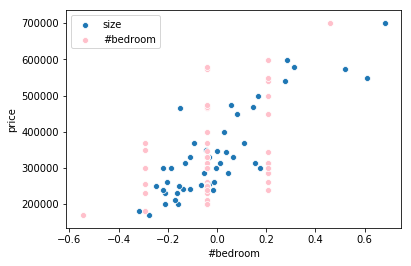

In [439]:
sns.scatterplot(x='size',y='price',data=csv)
sns.scatterplot(x='#bedroom',y='price',data=csv, color='pink')
plt.legend(['size','#bedroom'])

#### Matrices

In [456]:
X = np.matrix(csv[['x0','size','#bedroom']])

In [463]:
y = np.matrix(csv['price']).reshape((len(csv),1))
m = len(csv)
n = 3
theta = np.matrix(np.zeros((n, 1)))

In [488]:
X.shape

(47, 3)

In [489]:
theta.shape

(3, 1)

In [490]:
y.shape

(47, 1)

#### Update theta, cost function, gradient descent

The funtion that predicts the value for the matrix and the cost computing function are same.
We need a more generalized function to update theta and the gradient descent

In [465]:
def predict(X, theta):
    return X.dot(theta)

def calcCost(x, theta):
    h = predict(x, theta)
    j = [ (h.item(i)-y.item(i))**2 for i in range(m)] 
    return sum(j)/(2*m)

In [1]:
def updateThetaMatrix(x, h, theta, alpha):
    error = x.T.dot((h-y))
    return theta - (alpha * error/m)

def gradientDescent(x, n, theta, alpha):
    j = [calcCost(x, theta)]
    thetaValues = theta.A.tolist()
    for i in range(1, n):
        h = predict(x, theta)
        theta = updateThetaMatrix(x, h, theta, alpha)
        thetaValues.append(theta.A1.tolist())
        j.append(calcCost(x, theta))
    return j, thetaValues

#### Lets try these out for alpha = 0.01

In [485]:
j, t = gradientDescent(X, 2000, theta, 0.01)

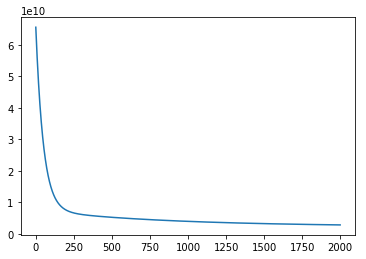

In [491]:
sns.lineplot(x=range(len(j)),y=j)

##### Converged around 1500. The final values of theta are

In [495]:
theta = t[-1]

In [503]:
print('h(xi) = ',round(theta[0],2))
for i in range(1, n):
    print(' + '+str(round(theta[i],2))+' x'+str(i))

h(xi) =  340412.66
 + 277668.27 x1
 + 88921.09 x2


If we normalize y as well, then we will not get such high values of theta. But, in that case during prediction, we will need to 'denormalize' it

### Prediction

In [506]:
def predictPrice(size, bed):
    norSize = (size-csvInfo.loc['mean','size'])/sizer
    norBed = (bed-csvInfo.loc['mean','#bedroom'])/brr
    features = np.matrix([1,norSize,norBed]).reshape((1,3))
    return features.dot(theta).item(0)

In [507]:
predictPrice(2000, 3)

336576.6450906052